C:\Users\hp\AppData\Local\Temp\ipykernel_13916\2829149840.py:10: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../insurance_data.txt', sep='|')


Columns: ['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims']
Data Types:
 UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  obj

d:\insurance_risk_analytics\venv\Lib\site-packages\numpy\_core\_methods.py:51: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Overall Loss Ratio: nan
Province
Eastern Cape          inf
Free State            inf
Gauteng               NaN
KwaZulu-Natal         inf
Limpopo               inf
Mpumalanga            NaN
North West            inf
Northern Cape    0.203831
Western Cape          inf
Name: LossRatio, dtype: float64


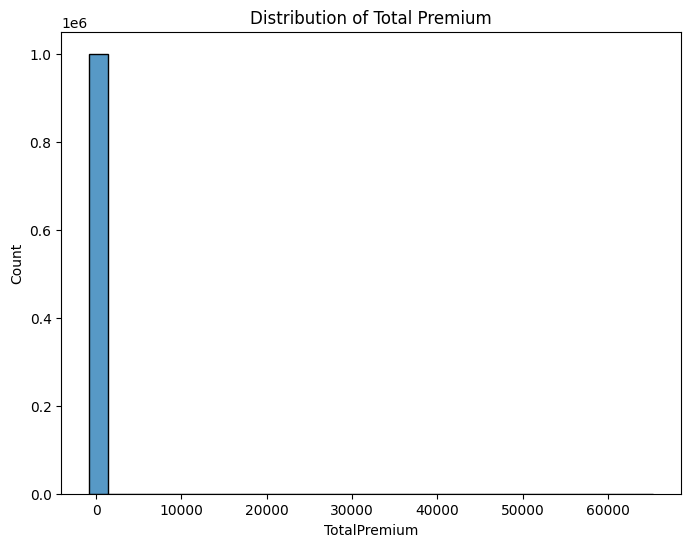

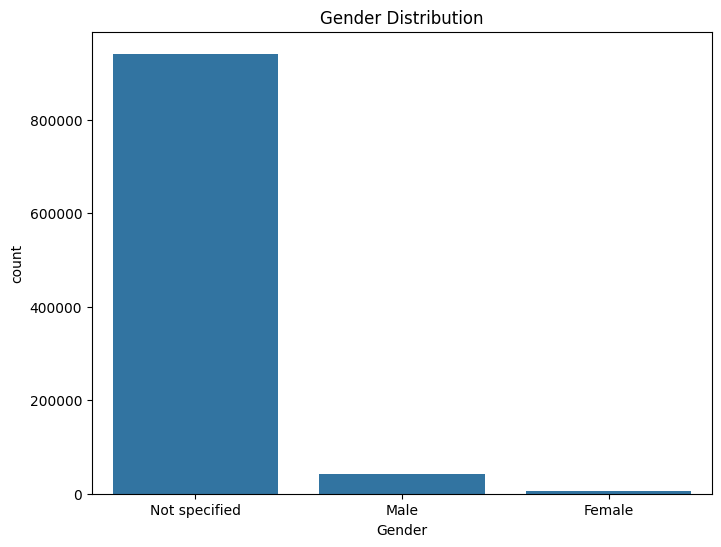

C:\Users\hp\AppData\Local\Temp\ipykernel_13916\2829149840.py:39: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('../figures/premium_vs_claims.png')
d:\insurance_risk_analytics\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


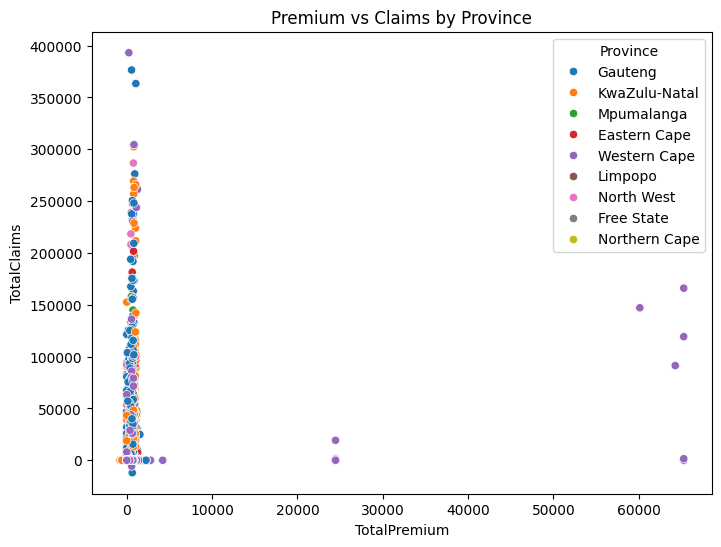

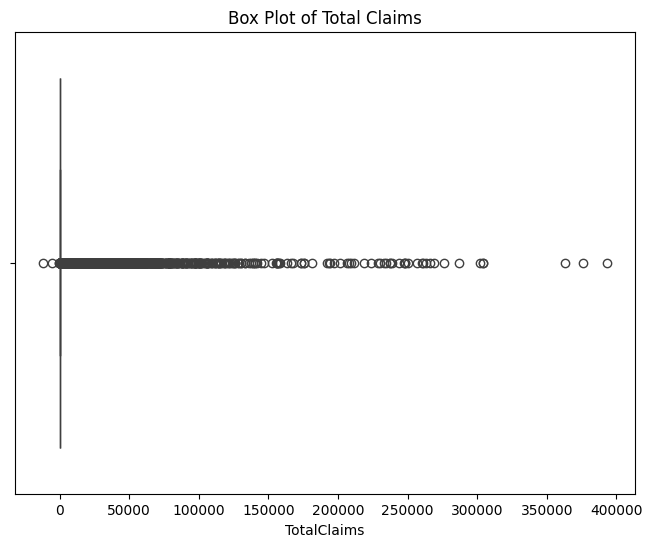

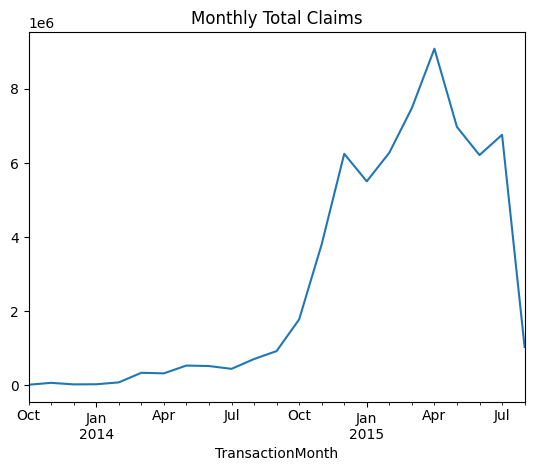

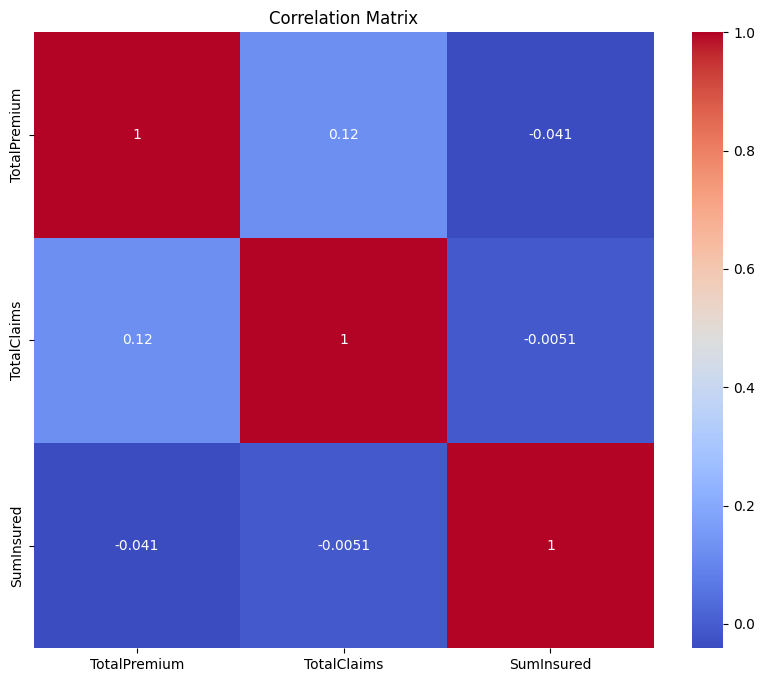

: 

In [ ]:
# Cell 1: Imports and setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.makedirs('../figures', exist_ok=True)

# Cell 2: Load data
df = pd.read_csv('../insurance_data.txt', sep='|')
print("Columns:", df.columns.tolist())
print("Data Types:\n", df.dtypes)
print("Missing Values:\n", df.isnull().sum())
print("Descriptive Statistics:\n", df[['TotalPremium', 'TotalClaims']].describe())

# Cell 3: Loss Ratio
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']
print("Overall Loss Ratio:", df['LossRatio'].mean())
print(df.groupby('Province')['LossRatio'].mean())

# Cell 4: Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['TotalPremium'], bins=30)
plt.title('Distribution of Total Premium')
plt.savefig('../figures/total_premium_histogram.png')
plt.show()

# Cell 5: Gender Bar Chart
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.savefig('../figures/gender_distribution.png')
plt.show()

# Cell 6: Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TotalPremium', y='TotalClaims', hue='Province', data=df)
plt.title('Premium vs Claims by Province')
plt.savefig('../figures/premium_vs_claims.png')
plt.show()

# Cell 7: Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='TotalClaims', data=df)
plt.title('Box Plot of Total Claims')
plt.savefig('../figures/claims_boxplot.png')
plt.show()

# Cell 8: Temporal Trends
try:
    df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])
    monthly_claims = df.groupby(df['TransactionMonth'].dt.to_period('M'))['TotalClaims'].sum()
    monthly_claims.plot(title='Monthly Total Claims')
    plt.savefig('../figures/monthly_claims.png')
    plt.show()
except Exception as e:
    print(f"Error parsing TransactionMonth: {e}")

# Cell 9: Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[['TotalPremium', 'TotalClaims', 'SumInsured']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('../figures/correlation_matrix.png')
plt.show()